In [1]:
# general imports
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
# local imports
import sys, os
sys.path.append(os.path.abspath(os.path.join('./utils')))

import libipts

In [3]:
# read data file
with open('data/stylus-sb2_13-1.iptsraw', 'rb') as f:
    data = f.read()

In [4]:
# basic parser to extract stylus data
# only works on v2 data for now (SB2, ...)
class StylusParser(libipts.Parser):
    def __init__(self):
        super().__init__()

    def _on_stylus_data_v2(self, header, index, report):
        self.points.append((header.elements, index, report))

    def parse(self, data):
        self.points = list()
        super().parse(data, silent=True)
        return self.points


# parse data
parser = StylusParser()
points = parser.parse(data)

In [5]:
# extract pen strokes
def get_strokes(points):
    strokes = list()
    strokes.append(list())

    last = 0
    for n, idx, pt in points:
        if (pt.mode & 0x03) == 0x03:
            strokes[-1].append((n, idx, pt))

        if (last & 0x03) == 0x03 and not (pt.mode & 0x03) == 0x03:
            strokes.append(list())

        last = pt.mode

    return [x for x in strokes if x]


strokes = get_strokes(points)

<IPython.core.display.Javascript object>


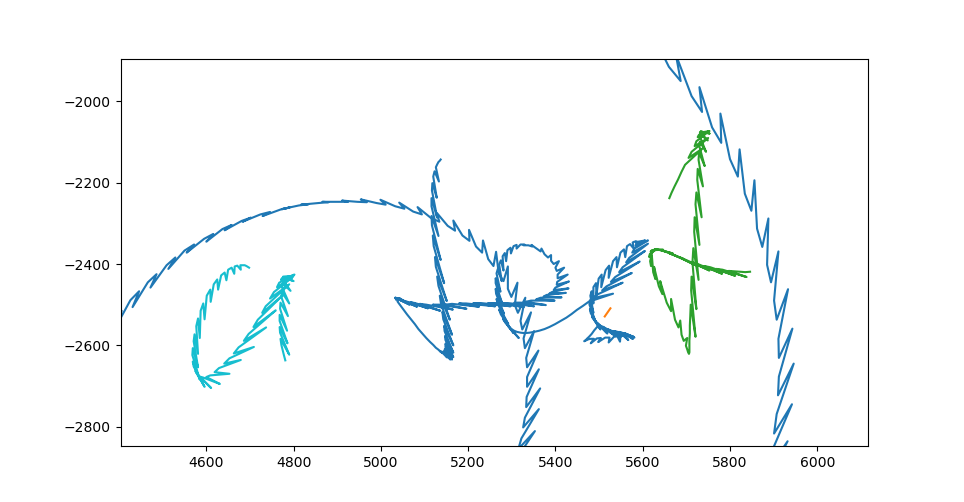

In [6]:
# plot
for stroke in strokes:
    xs = [pt.x for (n, idx, pt) in stroke]
    ys = [-pt.y for (n, idx, pt) in stroke]

    plt.plot(xs, ys)

plt.show()